# Exploratory data analysis of FIFA-2019

## by (Ahmed Salau)

# Investigation Overview

### In this investigation, I wanted to look for attributes that each playing positions must have. Factors that influence whether the player makes it as a top footballer.

- Age
- Nationality
- Overall
- Potential
- Club
- Value
- Wage
- Preferred Foot
- International Reputation
- Work Rate
- Body Type
- Position

### Context: Football analytics

### Content: Detailed attributes for every player registered in the latest edition of FIFA 19 database.

# Assessing the data

In [4]:
soccer.shape

(18207, 88)

# What is the structure of your dataset?

### I started the cleaning with 18207 observations, 88 features. After i removed columns not needed for my analysis and also removes null values. There are 16,643 observations in the dataset with 56 features to work with. Most variables are numeric in nature, but the variables Nationality, position are categorical which will prove worthy for this project. Features like age, height, weight will have it's role to play also.


### Observations from descriptive statistics

- 75% of the players in the dataset are below 29 years old. The oldest player is 45yrs and the youngest is 16yrs.
- The highest player value is €118,500,000 and the lowest player value is €10,000 .
- The mean wage is €9618 and the player with the highest earns €565000 weekly.

## Weight distribution of players

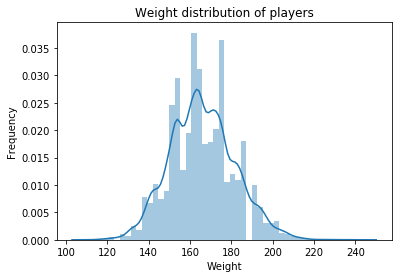

In [26]:
#histogram
sb.distplot(soccer['Weight'])
# Add labels
plt.title('Weight distribution of players')
plt.xlabel('Weight')
plt.ylabel('Frequency');

Our weight distribution looks normal.

## Age distribution of players

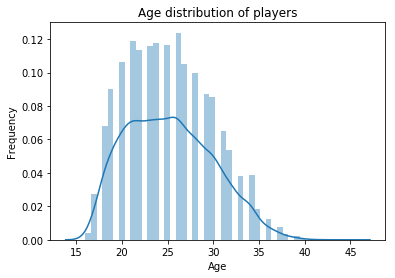

In [27]:
sb.distplot(soccer['Age']) 

# Add labels
plt.title('Age distribution of players')
plt.xlabel('Age')
plt.ylabel('Frequency');

This distribution shows most of the players in our data are in their 20s. And it's slightly positive skewed.

## Height distribution of players

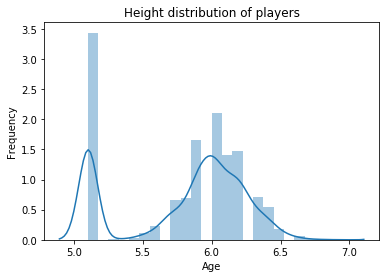

In [28]:
sb.distplot(soccer['Height']) 

# Add labels
plt.title('Height distribution of players')
plt.xlabel('Age')
plt.ylabel('Frequency');

- The Height variable is Bimodal.

## Now we move on to explore our categorical variables

## Most popular country ?

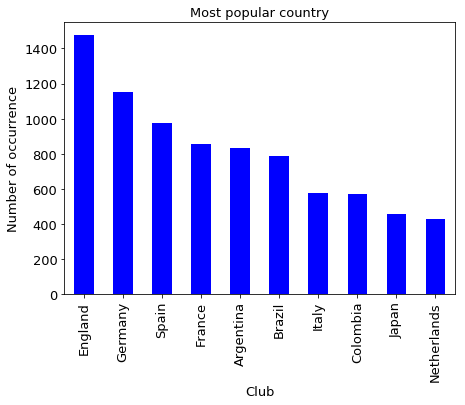

In [30]:
nation = soccer.Nationality.value_counts()[0:10]

#plot
g_bar = nation.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(7, 5);

#Add labels
plt.title('Most popular country', color = 'black', fontsize = '13')
plt.xlabel('Club', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

- This is interesting England is the top footballing nation in the data. 
- And only Japan represent Asia.

## Most popular club ?

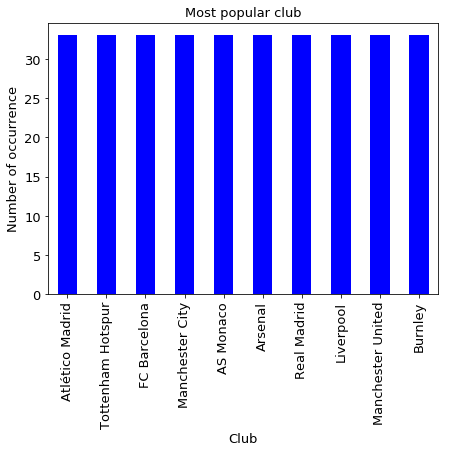

In [31]:
club = soccer.Club.value_counts()[0:10]

#plot
g_bar = club.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(7, 5);

#Add labelbs
plt.title('Most popular club', color = 'black', fontsize = '13')
plt.xlabel('Club', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

- This came not as a surprise because i would expect that if England is the most popular country, then football clubs from England should crowd the data. That's why 6 clubs from England make up the Top10.
- Spanish clubs 3.
- And Monaco represent the French Ligue.

## Most players are Right/Left footed players ?

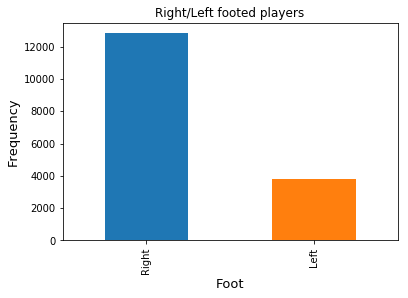

In [34]:
soccer['Preferred_foot'].value_counts().plot.bar(title="Right/Left footed players")
plt.ylabel('Frequency', color = 'black', fontsize = '13')
plt.xlabel('Foot', color = 'black', fontsize = '13');

- Most of the players are Right footed.

# Observations for Univariate Exploration

## For my continuous variables
> - I started with the Weight variable: This has a normal distribution with most players weighing between 154lbs and 165lbs
- Next i had a look at the Age variable: This was really interesting because it's distribution is slightly positively skewed. This made me to confirm my thought and i saw the mean is greater than median and median greater than the mode.
- The Height variable is Bimodal.

## For my categorical variables
> - I started with the 'Nationality' : I viewed the countries that appeared most in the data. England tops the ranking.
- Next i had a look at the Club and wasn't surprised at all to see 6 clubs from England in the top10.
- Most palyers in the data play the position ST which is the top striker in the team.
- Most players are Right footed.

> When i had a look at the players Height distribution, it was looking so abnormal then i noticed it was poorly format e.g 67 = 6'7. I fixed that and also some missing values were in columns like clubs, Joined, Contract and i removed such rows because for safety that was best for our analysis. 

# Correlations

### Correlation between weight and height

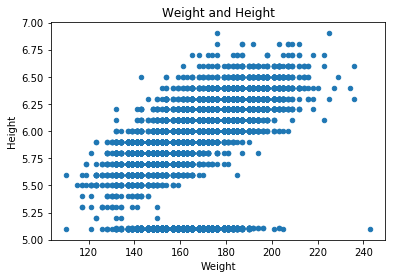

In [36]:
# Correlation between weight and height
soccer.plot(x='Weight', y='Height', kind='scatter', title = 'Weight and Height');

This shows a weak positive correlation

## Correlation between Value and Wage

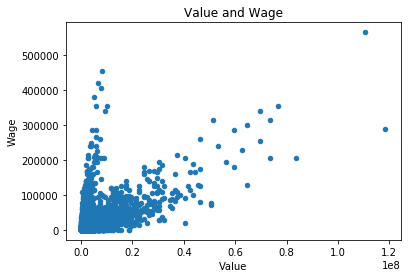

In [37]:
# Correlation between Value and Wage
soccer.plot(x='Value', y='Wage', kind='scatter', title = 'Value and Wage');

- This shows a fairly strong relationship

## Correlation between weight and strength

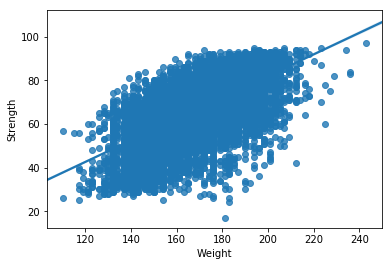

In [47]:
# Correlation between weight and strength
sb.regplot(data = soccer, x='Weight', y='Strength');
plt.xlabel('Weight')
plt.ylabel('Strength');

- There is a strong correlation between Weight and Strength.

## Correlation between Age and Reactions

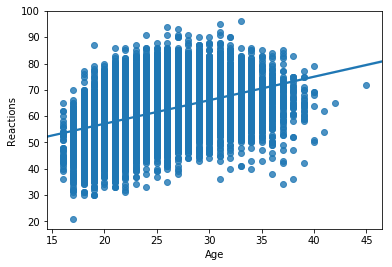

In [114]:
# Correlation between Age and Reactions
sb.regplot(data = soccer, x='Age', y='Reactions');
plt.xlabel('Age')
plt.ylabel('Reactions');

- This shows a weak positive relationship

## Heatmap to see relationships

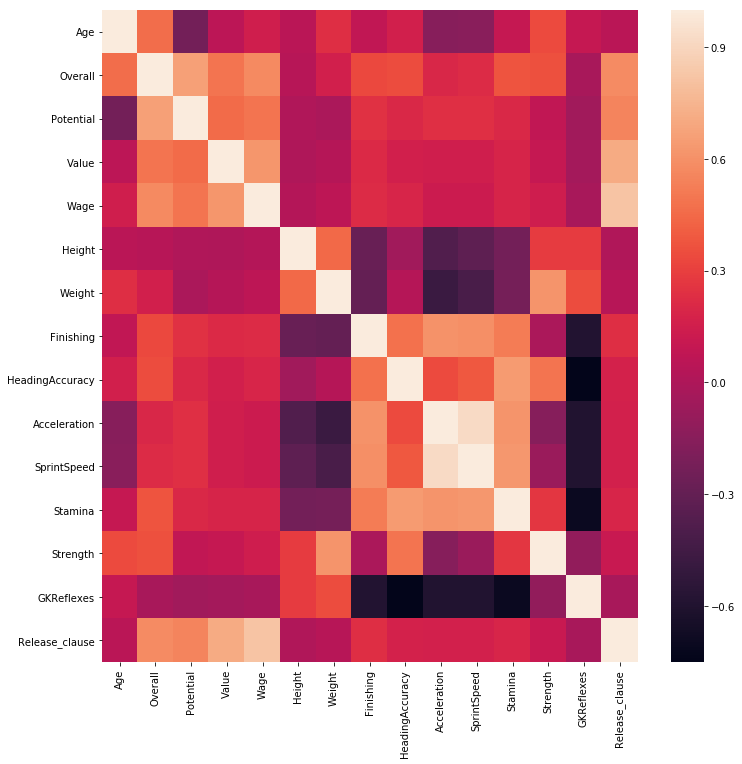

In [40]:
soccer_hist = soccer[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 
                     'Acceleration','SprintSpeed','Stamina','Strength','GKReflexes','Release_clause',]]

# plotting heatmap
f, ax = plt.subplots(figsize=(12, 12))
corr = soccer_hist.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

#### Observations

- Acceleration has a negative correlation with Weight.
- As expected Age has a negative correlation with Potential.
- Wage has a positive correlation with Release clause.
- Potential has a positive correlation with Release clause.
- Value has a positive correlation with Wage.

## Violin Plot between Preferred foot and Weakfoot

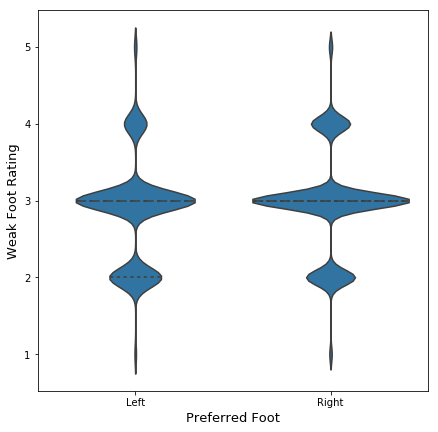

In [91]:
# plotting violin plot
ax = plt.subplots(1,1, figsize=(7,7))

base_color = sb.color_palette()[0]
sb.violinplot(data = soccer, x = 'Preferred_foot', y = 'Weak_foot', 
             color = base_color,
              inner = 'quartile')
plt.ylabel('Weak Foot Rating', color = 'black', fontsize = '13')
plt.xlabel('Preferred Foot', color = 'black', fontsize = '13');

- This shows us that most players, left footed or right foot had a rating of 3 for their week foot. Only few got a rating above 3.

## Violin Plot between Body type and Value

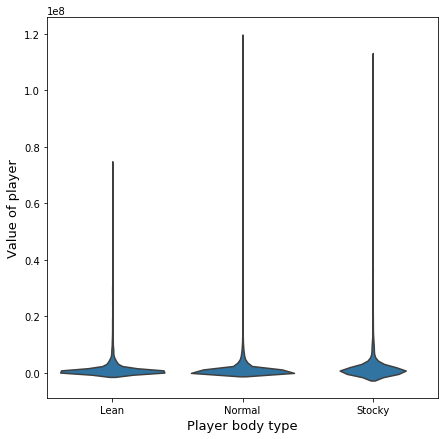

In [72]:
# plotting violin plot
ax = plt.subplots(1,1, figsize=(7,7))

base_color = sb.color_palette()[0]
sb.violinplot(data = soccer, x = 'Body_type', y = 'Value', 
             color = base_color,
              inner = None)
plt.ylabel('Value of player', color = 'black', fontsize = '13')
plt.xlabel('Player body type', color = 'black', fontsize = '13');

- This tells us that, players with normal body type are valued more. 

## Violin Plot between Position and Value

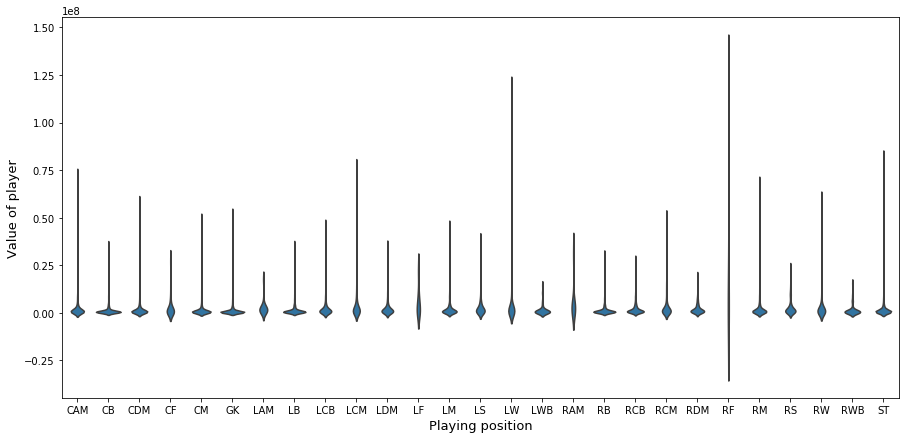

In [74]:
# plotting violin plot
ax = plt.subplots(1,1, figsize=(15,7))

base_color = sb.color_palette()[0]
sb.violinplot(data = soccer, x = 'Position', y = 'Value', 
             color = base_color,
              inner = None)
plt.ylabel('Value of player', color = 'black', fontsize = '13')
plt.xlabel('Playing position', color = 'black', fontsize = '13');

- Of all playing position, Right Forward players are valued more. Right wing back position and Left wing back position are valued lowest.

## Let's see the distribution of players body type.

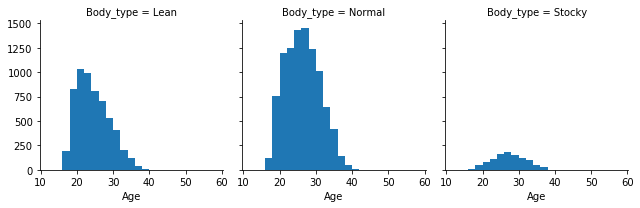

In [110]:
# plotting Facet
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = soccer, col = 'Body_type')
g.map(plt.hist, 'Age', bins = bins);

- This tells us the distribution of Age and the body type a player has. Most of our players in the data have a normal body type, and very few players have a stocky body type.

## Top 10 clubs that pay more wages

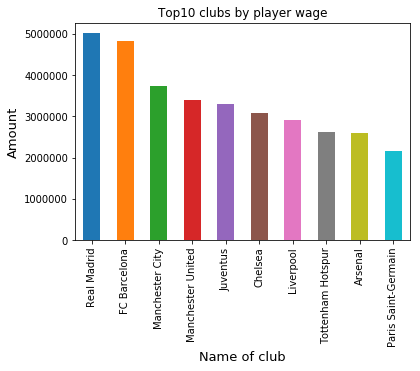

In [41]:
# Group by club then sum the wage.
wages10 = soccer.groupby('Club')['Wage'].sum().sort_values(ascending = False).head(10)

# plot
wages10.plot.bar(title="Top10 clubs by player wage")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Name of club', color = 'black', fontsize = '13');

- Real Madrid has the most Wage. This means they have a high number of high profile players

## Top 10 player who earn most

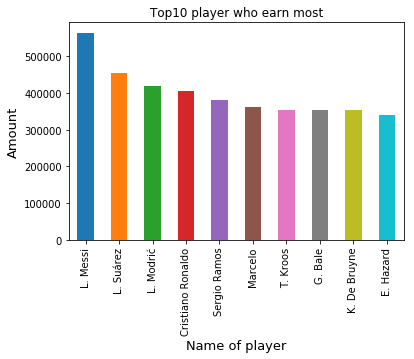

In [42]:
# Group by name then sum the wage.
p_wages10 = soccer.groupby('Name')['Wage'].sum().sort_values(ascending = False).head(10)

# plot
p_wages10.plot.bar(title="Top10 player who earn most")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Name of player', color = 'black', fontsize = '13');

- Messi earns more than any other player.

## Let's see if nationality has any role to play with the value of players

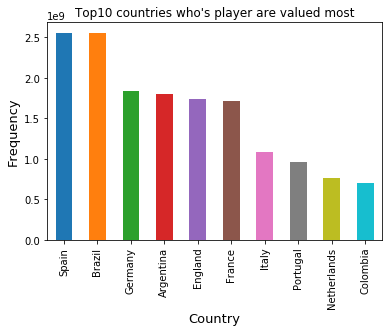

In [43]:
# Group by nationality then sum the value.
p_nation = soccer.groupby('Nationality')['Value'].sum().sort_values(ascending = False).head(10)

# plot
p_nation.plot.bar(title="Top10 countries who's player are valued most")
plt.ylabel('Frequency', color = 'black', fontsize = '13')
plt.xlabel('Country', color = 'black', fontsize = '13');

- This tells us Spanish and Brazilian players are valued most. 

## Countries with the highest player ratings

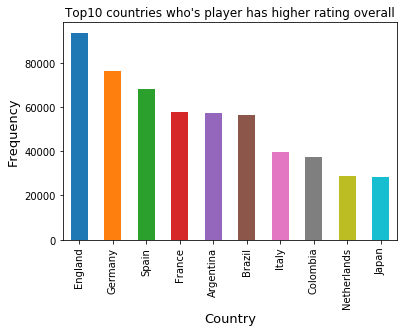

In [115]:
# Group by nationality then sum the value.
p_overall = soccer.groupby('Nationality')['Overall'].sum().sort_values(ascending = False).head(10)

# plot
p_overall.plot.bar(title="Top10 countries who's player has higher rating overall")
plt.ylabel('Frequency', color = 'black', fontsize = '13')
plt.xlabel('Country', color = 'black', fontsize = '13');

- Overall England players have the highest player ratings on FIFA19

## Observations on Relationships


-  I started by viewing the relationship between Weight and Height, there was a weak positive relationship between both features. Player value and wage has a fairly strong relationship, in most cases when a player is valued in a club, he also gets well paid too. Surprisingly Weight and Strength has a strong correlation. 
-  I had a look at some relationship between quantitative and qualitative features in the data. Right-footed and Left-footed players got rated '3' more, for their weaker foot. And also most players in the data have a normal body type. Only few players have a stocky body type.

- Wage has a positive correlation with Release clause. The higher a player's salary is, the higher clubs also set his release clause. Most football clubs see it as a way to tie a player to their club.

- This came as a 'No suprise', Acceleration has a negative correlation with Weight. The more a player weighs, his acceleration reduces. And also as expected Age has a negative correlation with Potential. Based on reasoning, when a player gets older he is no longer referred to as a potential. Young players are mostly seen as players with potentials.

- When i had a look at the club with the highest Wage. Real Madrid has the most Wage. This tells us they have a high number of high profile players, which is why they are referred to as All stars team. 
- Messi earns more than any other player. While i also tried to see if Nationality has any role to play with a player's valuation. I noticed Spanish and Brazilian players are valued most. English players have the highest player ratings on FIFA19.


- Surpisingly players who play Right-forward positions are valued more than other positions. Then the Right-wing back and Left-wing back are valued lowest.

## Looking further into Age, Weight and Body type

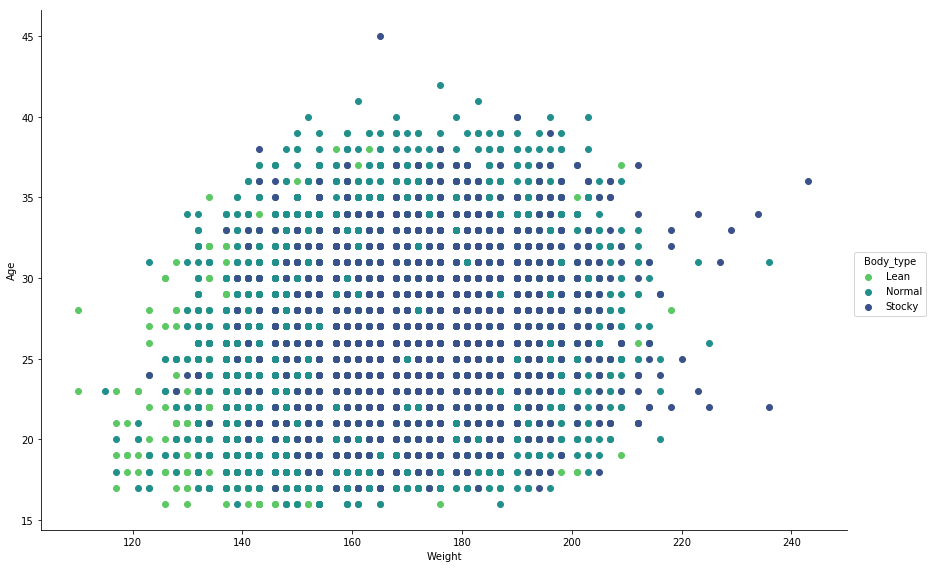

In [122]:
# plotting facet
g = sb.FacetGrid(data = soccer, hue = 'Body_type', size = 8, aspect = 1.5, palette = 'viridis_r')
g.map(plt.scatter, 'Weight', 'Age')
g.add_legend();

- This shows me something i didn't even think about. Most of the younger players weighs lesser and they also have more of a lean body type.

## Looking further into Age, Work rate and Acceleration

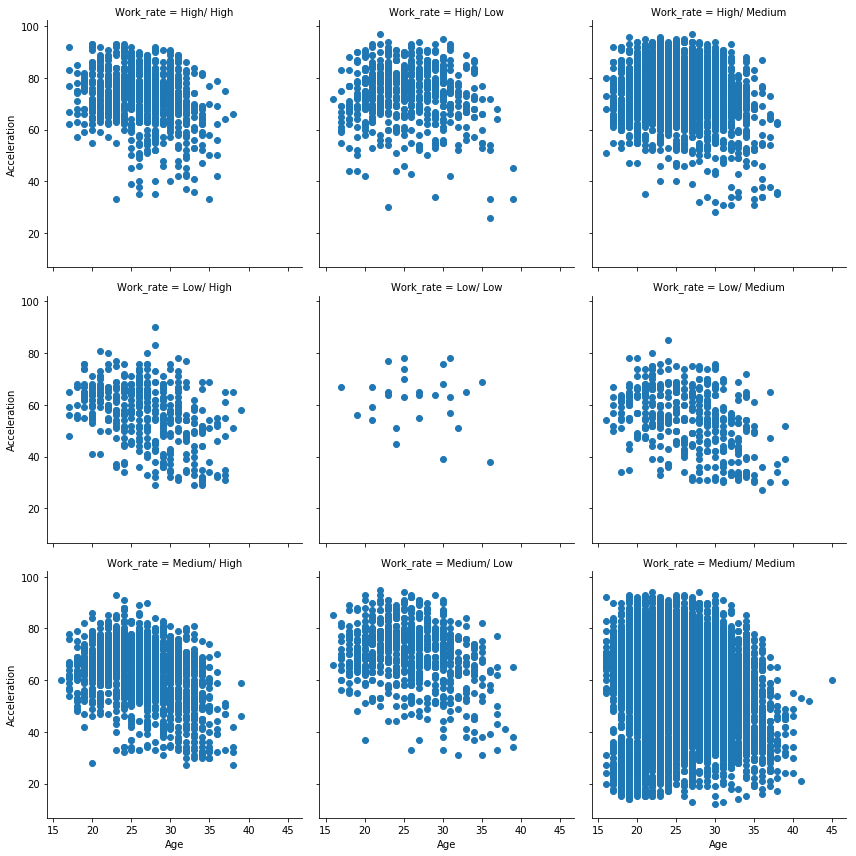

In [126]:
# plotting facet
g = sb.FacetGrid(data = soccer, col = 'Work_rate', col_wrap = 3, size = 4)
g.map(plt.scatter, 'Age', 'Acceleration');

## Looking further into Acceleration and Age

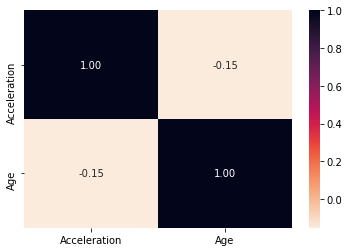

In [135]:
age_ace = ['Acceleration', 'Age']

# plotting heatmap 
sb.heatmap(soccer[age_ace].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

- Players whose work rate is High/High, High/Medium have a high acceleration and the Low/Low have a lower acceleration.

## Looking into players abilities

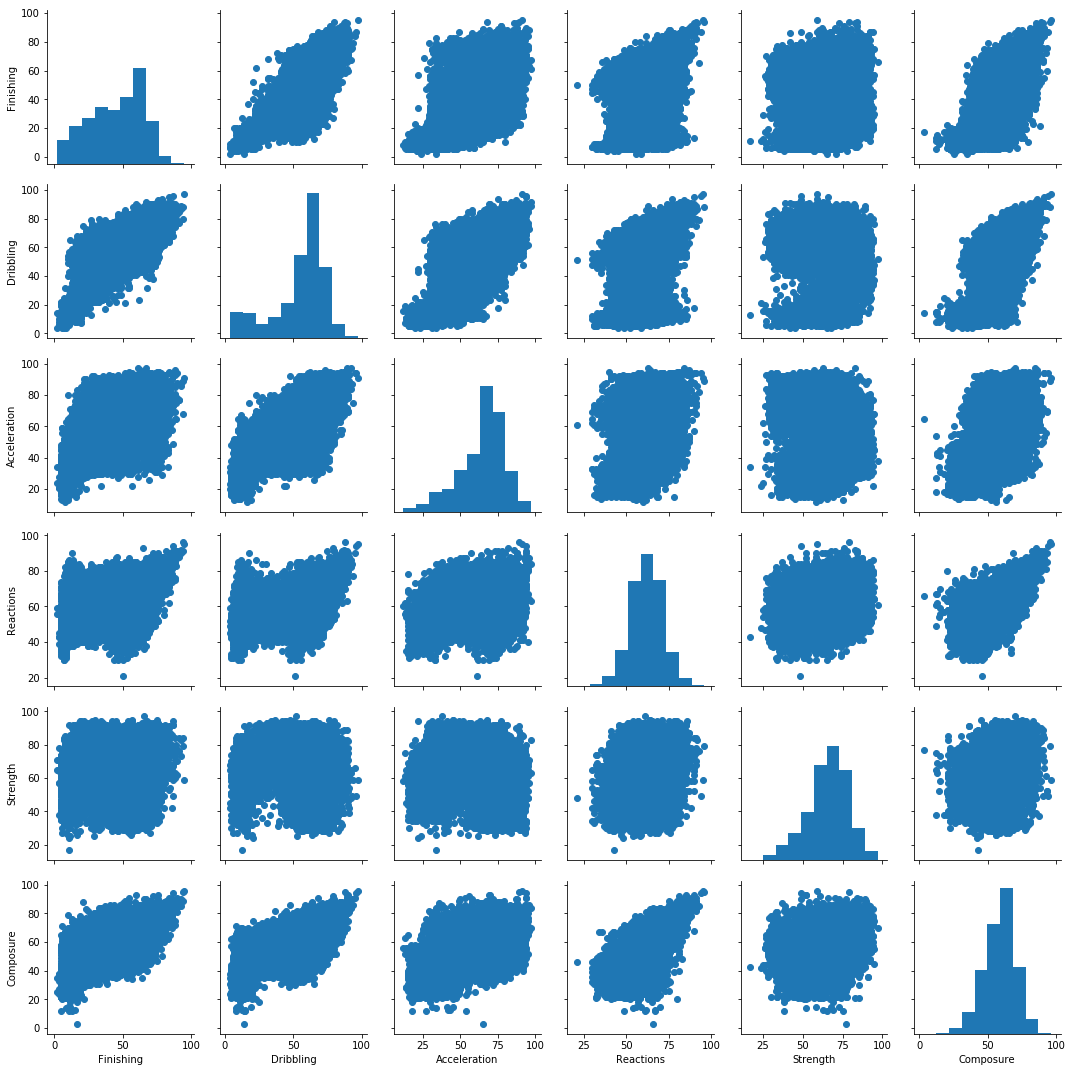

In [133]:
# plotting matrices 

player_stats = ['Finishing', 'Dribbling', 'Acceleration', 'Reactions', 'Strength', 'Composure']

g = sb.PairGrid(data = soccer, vars = player_stats);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

## Heatmap of Abilities to see relationships

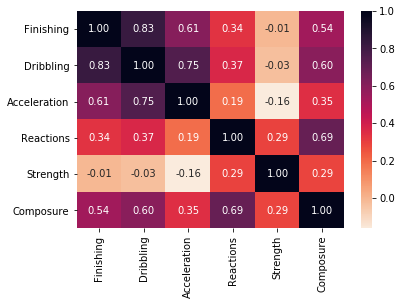

In [134]:
# plotting heatmap 
sb.heatmap(soccer[player_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

#### Observations

- There is a negative correlaton between Finishing and Strength.
- Surprisingly there is a really strong positive correlation between Finishing and Dribbling.
- Another surprising strong positively correlation between Acceleration and Dribbling.
- A negative relationship between Strength and Finishing, Strength, Dribblinng.

### Observations 

> I decided to look further into how infuential the Age feature and acceleration could be regarding a player's work rate, it's so obvious now that as a player ages, so does his acceleration but in some cases a player's age does not influence his work rate. Players whose work rate is High/High, High/Medium have a high acceleration and the Low/Low have a lower acceleration.


> I found some interesting relationships when i checked the pairwise relationships between players abilities. It's really surprising to know there is a really strong positive correlation between a player's Finishing and Dribbling ability.

In [ ]:
jupyter nbconvert exploration_temp-Copy1.ipynb --to slides --post serve --template output_toggle